# CS4320 Introduction to Machine Learning

**Please type your group name here:**


In [1]:
GroupName = "NoProblem"
assert GroupName != "", 'Please enter your name in the above quotation marks, thanks!'

## Table of contents

1. [Understanding the problem](#1)
2. [Imports](#2)
   1. [Importing Packages](#2a)
   2. [Data splitting](#2b)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5)
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11)
12. [Results on the test set](#12)
13. [Submit the predictions to Kaggle](#13)
14. [Your takeaway from the course](#14)


<!-- BEGIN QUESTION -->

## 1 Prediction Problem and Explaination <a name="1"></a>

<hr>

**Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset.**


The problem is to forecast store sales for _Corporación Favorita_, a large Ecuadorian-based grocery retailer. The goal is to use previous sales data. The previously sales data is _family_ category which has a _store_nbr_, total number of items in that category that were _onpromotion_ that day, the specific date, and the total items sold that day for that family. The dates are able to be cross referenced with holidays in order to get a better time prediction. The family I am assuming will be very time dependent as needed change over the course of the year and many sales in my experience are holiday dependent.


<!-- END QUESTION -->

<br><br>


## 2 Imports <a name="2"></a>

<hr>


### 2a Importing Packages <a name="2a"></a>

<hr>

**Import all necessary packages**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

<!-- BEGIN QUESTION -->

### 2b Data splitting <a name="2b"></a>

<hr>

**Split the data into train and test portions. Note that the test.csv is the end file to test, not the data split for testing**


In [2]:
dataset_df = pd.read_csv('data/train.csv')
final_test_df = pd.read_csv('data/test.csv')

In [3]:
# split into train and test sets
train_df, test_df = train_test_split(dataset_df, test_size=0.3, shuffle=False)

<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>

<hr>


### Perform exploratory data analysis on the train set, including summary statistics


In [7]:
display(train_df.head())
display(train_df.info())

pd.set_option('display.float_format', '{:.2f}'.format)

display("Numerical Data Description")
display(train_df.describe(include=['int64', 'float64']))

display("Categorical Data Description")
display(train_df.describe(include=['object', 'datetime64'], datetime_is_numeric=True))

display("Family (Category) Counts")
display(train_df['family'].value_counts())

display("First and last date")
display(train_df['date'].min())
display(train_df['date'].max())

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0
1,1,2013-01-01,1,BABY CARE,0.00,0
2,2,2013-01-01,1,BEAUTY,0.00,0
3,3,2013-01-01,1,BEVERAGES,0.00,0
4,4,2013-01-01,1,BOOKS,0.00,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100621 entries, 0 to 2100620
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 112.2+ MB


None

'Numerical Data Description'

,id,store_nbr,sales,onpromotion
count,2100621.00,2100621.00,2100621.00,2100621.00
mean,1050310.00,27.50,312.81,0.96
std,606397.19,15.58,982.46,7.35
min,0.00,1.00,0.00,0.00
25%,525155.00,14.00,0.00,0.00
50%,1050310.00,27.00,6.00,0.00
75%,1575465.00,41.00,168.00,0.00
max,2100620.00,54.00,46271.00,235.00


'Categorical Data Description'

,date,family
count,2100621,2100621
unique,1179,33
top,2013-01-01,AUTOMOTIVE
freq,1782,63656


'Family (Category) Counts'

AUTOMOTIVE                    63656
BEAUTY                        63656
BEVERAGES                     63656
BOOKS                         63656
BREAD/BAKERY                  63656
BABY CARE                     63656
PERSONAL CARE                 63655
LINGERIE                      63655
LIQUOR,WINE,BEER              63655
MAGAZINES                     63655
MEATS                         63655
POULTRY                       63655
PET SUPPLIES                  63655
PLAYERS AND ELECTRONICS       63655
LADIESWEAR                    63655
PREPARED FOODS                63655
PRODUCE                       63655
SCHOOL AND OFFICE SUPPLIES    63655
LAWN AND GARDEN               63655
HOME AND KITCHEN II           63655
HOME CARE                     63655
HOME APPLIANCES               63655
HOME AND KITCHEN I            63655
HARDWARE                      63655
GROCERY II                    63655
GROCERY I                     63655
FROZEN FOODS                  63655
EGGS                        

'First and last date'

'2013-01-01'

'2016-03-27'

_Summary Statistics_

1. Here, we can see that there are 2 discrete varaibles: _date_ (1684 dates ranging from 2013 to 2016) and _family_ (33 unique family categories which have near equal statified counts).
2. The rest of the variables are numerical: id (unique identifier, discrete), store_nbr (1-54, discrete), sales (appears to be skewed, need to see visualization, continuous), and onpromotion (appears to be skewed, need to see visualization).

### Useful Visual Statistics


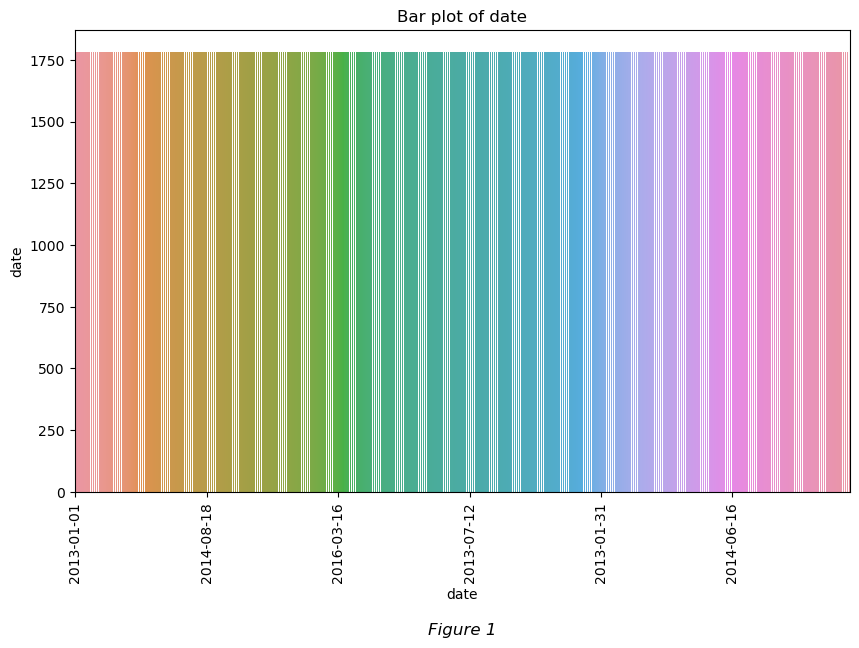

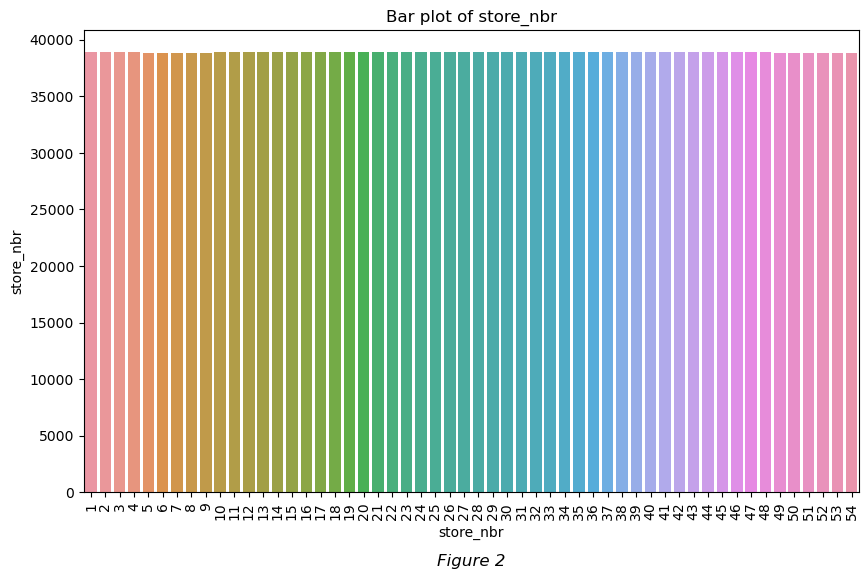

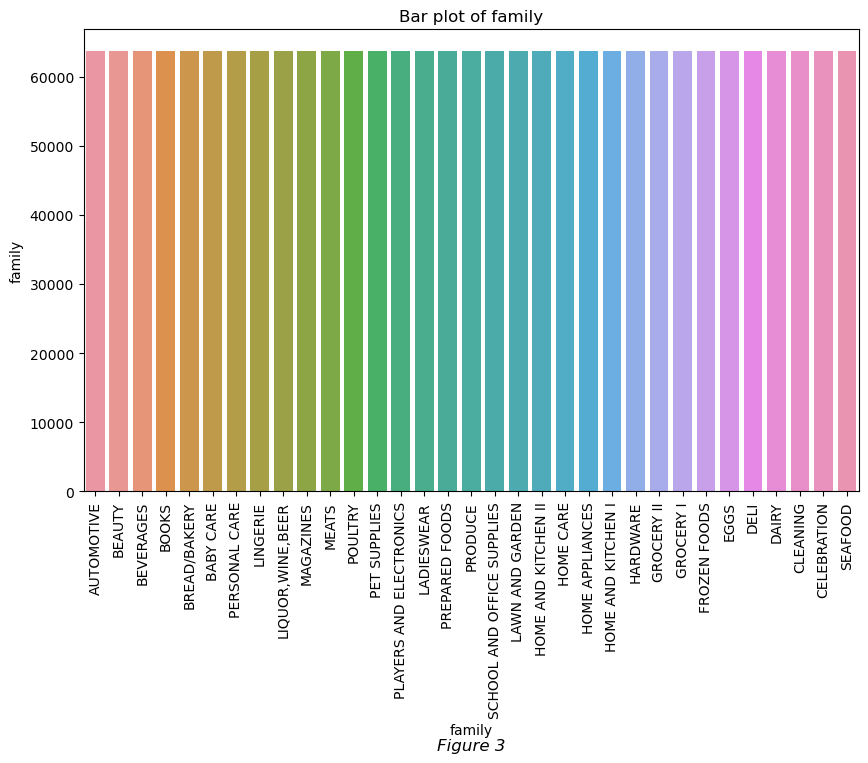

In [8]:

eda_df = train_df.copy(deep=True)

# Create bar plot for 'date'
freq_df = eda_df['date'].value_counts().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='date', data=freq_df)
plt.title('Bar plot of date')
plt.xlabel('date')
plt.xticks(np.arange(0, len(freq_df['index']), step=200), rotation=90)
plt.text(0.5, -0.30, 'Figure 1', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')
plt.show()

# Create bar plot for 'store_nbr'
freq_df = eda_df['store_nbr'].value_counts().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='store_nbr', data=freq_df)
plt.title('Bar plot of store_nbr')
plt.xlabel('store_nbr')
plt.xticks(rotation=90)
plt.text(0.5, -0.15, 'Figure 2', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')
plt.show()

# Create bar plot for 'family'
freq_df = eda_df['family'].value_counts().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='family', data=freq_df)
plt.title('Bar plot of family')
plt.xlabel('family')
plt.xticks(rotation=90)
plt.text(0.5, -0.55, 'Figure 3', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')
plt.show()

In Figures 1,2, and 3, we are shown that _family_, _date_, and _store\_nbr_ are all generally stratified. This is good as it means that we have a good distribution of data for each of these variables.


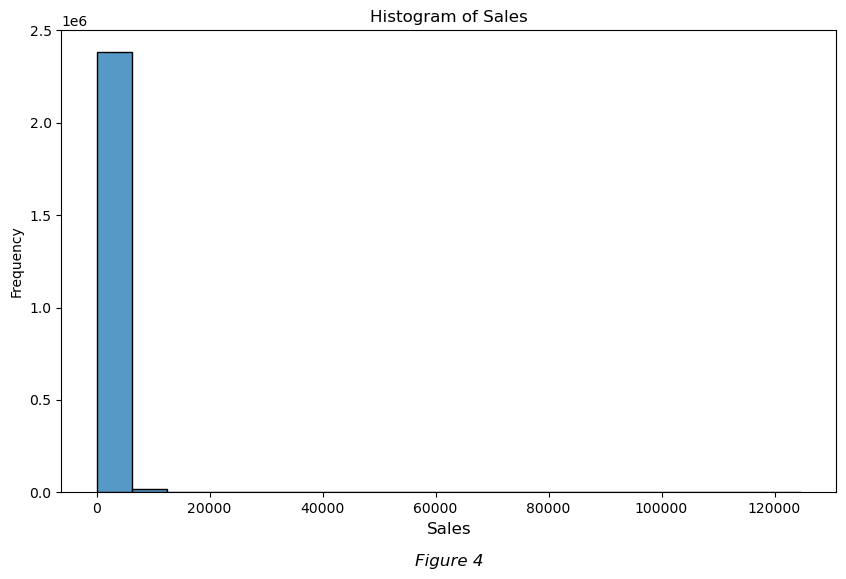

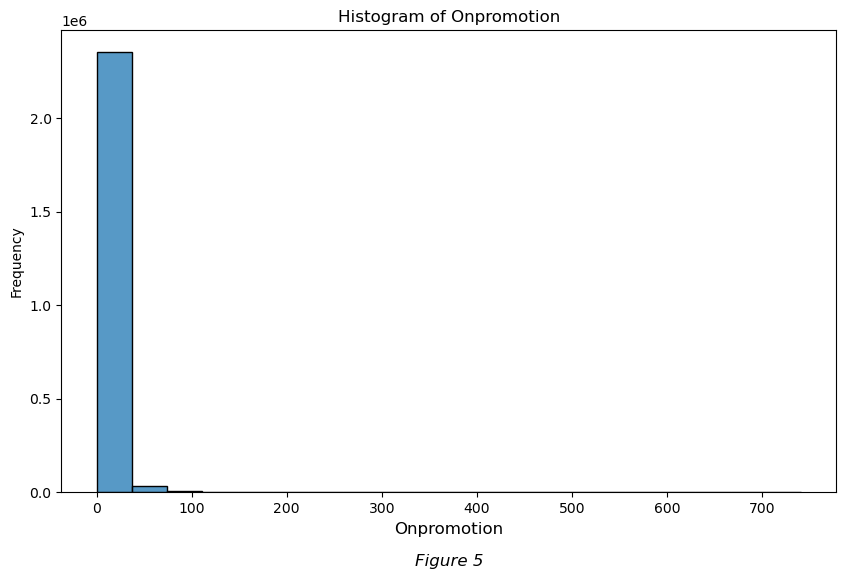

In [7]:
# Show all sales 
plt.figure(figsize=(10, 6))
sns.histplot(train_df['sales'], bins=20)
plt.title('Histogram of Sales')
plt.xlabel('Sales', fontsize=12)
plt.text(0.5, -0.15, 'Figure 4', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')
plt.ylabel('Frequency')
plt.show()

# Show all onpromotion
plt.figure(figsize=(10, 6))
sns.histplot(train_df['onpromotion'], bins=20)
plt.title('Histogram of Onpromotion')
plt.xlabel('Onpromotion', fontsize=12)
plt.text(0.5, -0.15, 'Figure 5', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')
plt.ylabel('Frequency')
plt.show()

In [8]:
''' We will test the Onpromotion variable, since it is an independent varaible, 
to see if Feature Cutting should be used. The feature cut would be the upper quantile'''

onpromo_zero_cnt = len(train_df[train_df['onpromotion'] == 0])
ratio = onpromo_zero_cnt / len(train_df)
print("Ratio of Zero in Onpromotion: {:.2f}".format(ratio))

Ratio of Zero in Onpromotion: 0.80


In [9]:
'''Since Ratio is too high, we will not use Feature Cutting and instead use ln(1+x) transformation to normalize the data, then use StandardScalar Feature Scaling in preprocessing''' 
train_df['onpromotion'] = np.log1p(train_df['onpromotion'])
test_df['onpromotion'] = np.log1p(test_df['onpromotion'])
final_test_df['onpromotion'] = np.log1p(final_test_df['onpromotion'])

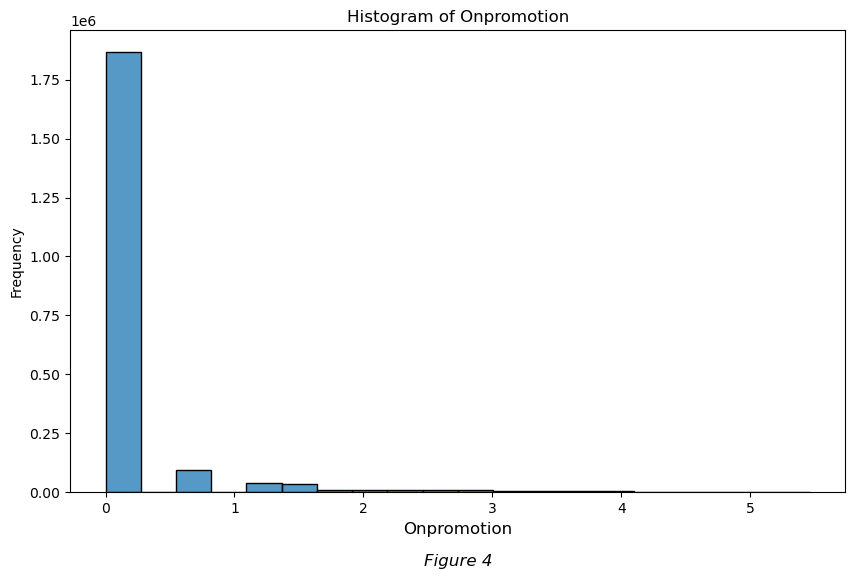

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['onpromotion'], bins=20)
plt.title('Histogram of Onpromotion')
plt.xlabel('Onpromotion', fontsize=12)
plt.text(0.5, -0.15, 'Figure 4', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')
plt.ylabel('Frequency')
plt.show()

In [ ]:
'''For sales, since it is the dependent variable, Feature Cutting is not the first choice. Observing that the upper quantile of _sales_ is significant, we will apply a transformation to normalize the data, then use StandardScalar Feature Scaling in preprocessing'''
train_df['sales'] = np.log1p(train_df['sales'])
test_df['sales'] = np.log1p(test_df['sales'])


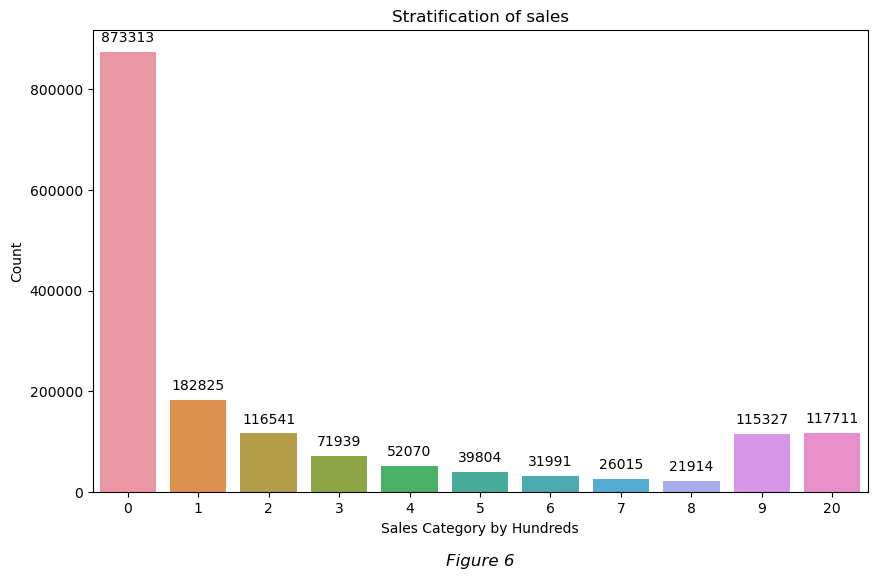

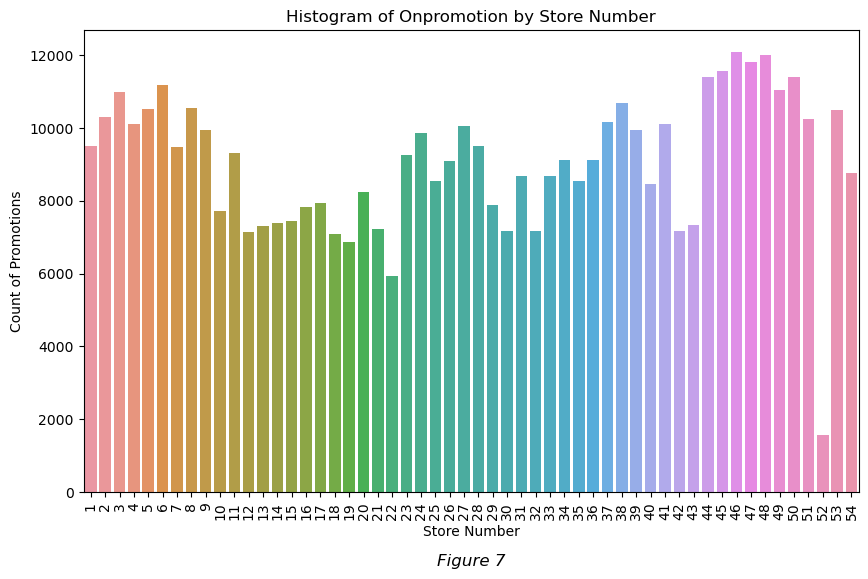

C:\Users\sarad\AppData\Local\Temp\ipykernel_21492\1991860845.py:35: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


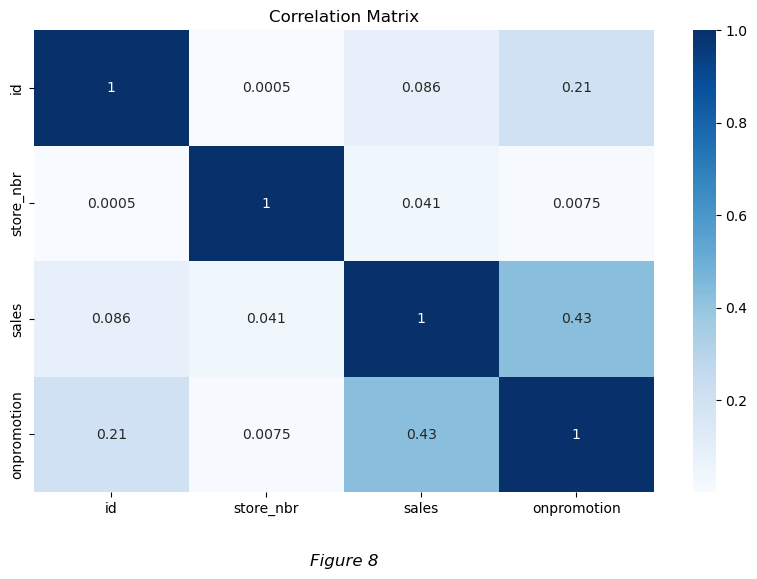

In [9]:
# Create a new column 'sales_category' to stratify the sales into 10 categories
eda_df['sales_category'] = pd.cut(eda_df['sales'], bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 2000, np.inf], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20])

eda_df = eda_df.dropna(subset=['sales_category'])
eda_df['sales_category'] = eda_df['sales_category'].astype(int)

# Plot the stratification of sales to see if there is a significant outliers 
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sales_category', data=eda_df)
plt.title('Stratification of sales')
plt.xlabel('Sales Category by Hundreds')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.text(0.5, -0.15, 'Figure 6', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')
plt.show()

# Plot a histogram, seeing if some stores are more inclined to do promotions
promotion_store = train_df[train_df['onpromotion'] != 0].groupby('store_nbr')['onpromotion'].count().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="store_nbr", y="onpromotion", data=promotion_store)
plt.title('Histogram of Onpromotion by Store Number')
plt.xlabel('Store Number')
plt.ylabel('Count of Promotions')
plt.xticks(rotation=90)
plt.text(0.5, -0.15, 'Figure 7', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')
plt.show()

# Plot a correlation matrix with the center as sales
corr_matrix = train_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.text(0.5, -0.15, 'Figure 8', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, style='italic')
plt.show()



In [10]:
# isolate year, month, and day from date
eda_df['date'] = pd.to_datetime(eda_df['date'])
eda_df['day'] = eda_df['date'].dt.strftime('%Y').astype(int)
eda_df['month'] = eda_df['date'].dt.strftime('%m').astype(int)
eda_df['year'] = eda_df['date'].dt.strftime('%d').astype(int)
eda_df = eda_df.drop(columns=['date'])
eda_df

,id,store_nbr,family,sales,onpromotion,sales_category,day,month,year
2902383,2902383,45,AUTOMOTIVE,13.00,2,0,2017,6,21
1651514,1651514,47,PREPARED FOODS,325.52,0,3,2015,7,18
1948349,1948349,26,PREPARED FOODS,4.00,0,0,2016,1,2
2893871,2893871,7,BEAUTY,5.00,1,0,2017,6,16
2867501,2867501,16,SEAFOOD,4.00,0,0,2017,6,2
...,...,...,...,...,...,...,...,...,...
2003274,2003274,18,DELI,184.07,0,1,2016,2,2
1692743,1692743,54,DAIRY,181.00,0,1,2015,8,10
2229084,2229084,53,AUTOMOTIVE,8.00,0,0,2016,6,7
2768307,2768307,33,BEVERAGES,1594.00,15,9,2017,4,7


- In Figures 4 and 5 we see that _onpromotion_ and _sales_ are heavily right skewed. We then see that _onpromotion_ variable is not a good candidate for Feature Cutting as there are a significant amount of zero values in the dataset. When putting _sales_ categories into statification for visualization testing in Figure 5, we see that there is a decent amount of data that would be considered outliers (the last bar `20`), so Feature Cutting could be deterimental to _sales_. Also, _onpromotion_ has the highest correlation with another variable (sales) so dropping this variable is not an option. This means that _onpromotion_ and other added numerical features will be minmax scaled, not standard scaled.
- Figure 7 shows low indication that there is a correlation between _store_nbr_ and _onpromotion_. That lack of correlation is further shown in Figure 8 where we see less than 0.05 correlation between _store_nbr_ and any other variable. To retain the predition value of the stores, in the next step we will use stores.csv to identifiy store clusterings, state, and city, and use those as features.
- Since this is a time-series problem, we will be putting a heavier emphasis on the _date_ variable by separating it into day, month, and year. Above, you can see it performed on the _eda_df_ which has been used for testing data augmentation without impacting the original dataset. Now, these changes can be applied in the feature engineering step.


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>

<hr>

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set. You may have to go back and forth between feature engineering and preprocessing. Briefly explain why you come up with these new features.


In [11]:
# Import useful CSV'set
holiday_events_df = pd.read_csv('data/holidays_events.csv')
stores_df = pd.read_csv('data/stores.csv')

In [12]:
# Show the imported CVS's head
display(holiday_events_df.head())
display(stores_df.head())

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [13]:
# Separate useful df's into smaller df's
national_holiday_df = holiday_events_df[(holiday_events_df['locale'] == 'National') & (holiday_events_df['type'] == 'Holiday')]['date']
national_not_holiday_df = holiday_events_df[(holiday_events_df['locale'] == 'National') & (holiday_events_df['type'] != 'Holiday')]['date']

local_holiday_df = holiday_events_df[(holiday_events_df['locale'] == 'Local') & (holiday_events_df['type'] == 'Holiday')]['date']
local_not_holiday_df = holiday_events_df[(holiday_events_df['locale'] == 'Local') & (holiday_events_df['type'] != 'Holiday')]['date']

In [14]:
def holiday_transform(dataframe):
    dataframe['national_holiday'] = dataframe['date'].isin(national_holiday_df).astype(int)
    dataframe['national_not_holiday'] = dataframe['date'].isin(national_not_holiday_df).astype(int)
    dataframe['local_holiday'] = dataframe['date'].isin(local_holiday_df).astype(int)
    dataframe['local_not_holiday'] = dataframe['date'].isin(local_not_holiday_df).astype(int)
    return dataframe

def date_transform(dataframe):
    dataframe['date'] = pd.to_datetime(dataframe['date'])
    dataframe['day'] = dataframe['date'].dt.strftime('%Y')
    dataframe['month'] = dataframe['date'].dt.strftime('%m')
    dataframe['year'] = dataframe['date'].dt.strftime('%d')
    dataframe = dataframe.drop(columns=['date'])
    return dataframe

In [15]:
train_df = date_transform(holiday_transform((train_df)))
train_df.head()

,id,store_nbr,family,sales,onpromotion,national_holiday,national_not_holiday,local_holiday,local_not_holiday,day,month,year
2902383,2902383,45,AUTOMOTIVE,13.00,2,0,0,0,0,2017,06,21
1651514,1651514,47,PREPARED FOODS,325.52,0,0,0,0,0,2015,07,18
1948349,1948349,26,PREPARED FOODS,4.00,0,0,0,0,0,2016,01,02
2893871,2893871,7,BEAUTY,5.00,1,0,0,0,0,2017,06,16
2867501,2867501,16,SEAFOOD,4.00,0,0,0,0,0,2017,06,02


In [16]:
# transform 'store_nbr' based on what cluster, city, and state it is in
def store_transform(dataframe):
    dataframe['store_cluster'] = stores_df['cluster'].values[dataframe['store_nbr'].values - 1]
    dataframe['city'] = stores_df['city'].values[dataframe['store_nbr'].values - 1]
    dataframe['state'] = stores_df['state'].values[dataframe['store_nbr'].values - 1]
    dataframe = dataframe.drop(columns=['store_nbr'])
    return dataframe

train_df = store_transform(train_df)

In [17]:
# Display manual transformations so far
train_df.head()

,id,family,sales,onpromotion,national_holiday,national_not_holiday,local_holiday,local_not_holiday,day,month,year,store_cluster,city,state
2902383,2902383,AUTOMOTIVE,13.00,2,0,0,0,0,2017,06,21,11,Quito,Pichincha
1651514,1651514,PREPARED FOODS,325.52,0,0,0,0,0,2015,07,18,14,Quito,Pichincha
1948349,1948349,PREPARED FOODS,4.00,0,0,0,0,0,2016,01,02,10,Guayaquil,Guayas
2893871,2893871,BEAUTY,5.00,1,0,0,0,0,2017,06,16,8,Quito,Pichincha
2867501,2867501,SEAFOOD,4.00,0,0,0,0,0,2017,06,02,3,Santo Domingo,Santo Domingo de los Tsachilas


### Separating Feature Vectors and Targets


In [18]:
X_train = train_df.drop(columns=['sales'])
y_train = train_df['sales']

<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>


### Identifying different feature types and the transformations to apply on each feature type.


In [19]:
# Feature List
categorical_features = ['family', 'store_cluster', 'city', 'state'] # One Hot Encoded
binary_features = ['national_holiday', 'national_not_holiday', 'local_holiday', 'local_not_holiday'] # One Hot Encoded (Binary)
scaling_features = ['onpromotion', 'day', 'month', 'year'] # MinMax Scaled
drop_features = ['id'] # Drop
target = 'sales'

### Defining a column transformer and perform preprocessing on the train set


In [20]:
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
binary_transformer = OneHotEncoder(drop="if_binary", dtype=int)
scaling_transformer = StandardScaler()

preprocessor = make_column_transformer(
    (categorical_transformer, categorical_features),
    (binary_transformer, binary_features),
    (scaling_transformer, scaling_features),
    ('drop', drop_features),
    remainder='passthrough'
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder-1',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['family', 'store_cluster', 'city', 'state']),
                                ('onehotencoder-2',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>),
                                 ['national_holiday', 'national_not_holiday',
                                  'local_holiday', 'local_not_holiday']),
                                ('standardscaler', StandardScaler(),
                                 ['onpromotion', 'day', 'month', 'year']),
                                ('drop', 'drop', ['id'])])

In [21]:
X_train_prepared = preprocessor.fit_transform(X_train)
X_train_prepared

array([[ 1.        ,  0.        ,  0.        , ...,  1.6073284 ,
        -0.06134829,  0.61091494],
       [ 0.        ,  0.        ,  0.        , ...,  0.12064319,
         0.23400097,  0.26975882],
       [ 0.        ,  0.        ,  0.        , ...,  0.8639858 ,
        -1.53809456, -1.54974051],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.8639858 ,
        -0.06134829, -0.98114697],
       [ 0.        ,  0.        ,  0.        , ...,  1.6073284 ,
        -0.6520468 , -0.98114697],
       [ 0.        ,  0.        ,  0.        , ...,  0.8639858 ,
        -0.06134829, -1.54974051]])

In [22]:
column_names = list(
    preprocessor.named_transformers_["onehotencoder-1"].get_feature_names_out(categorical_features)) + list(
    preprocessor.named_transformers_["onehotencoder-2"].get_feature_names_out(binary_features)) + scaling_features

column_names

['family_AUTOMOTIVE',
 'family_BABY CARE',
 'family_BEAUTY',
 'family_BEVERAGES',
 'family_BOOKS',
 'family_BREAD/BAKERY',
 'family_CELEBRATION',
 'family_CLEANING',
 'family_DAIRY',
 'family_DELI',
 'family_EGGS',
 'family_FROZEN FOODS',
 'family_GROCERY I',
 'family_GROCERY II',
 'family_HARDWARE',
 'family_HOME AND KITCHEN I',
 'family_HOME AND KITCHEN II',
 'family_HOME APPLIANCES',
 'family_HOME CARE',
 'family_LADIESWEAR',
 'family_LAWN AND GARDEN',
 'family_LINGERIE',
 'family_LIQUOR,WINE,BEER',
 'family_MAGAZINES',
 'family_MEATS',
 'family_PERSONAL CARE',
 'family_PET SUPPLIES',
 'family_PLAYERS AND ELECTRONICS',
 'family_POULTRY',
 'family_PREPARED FOODS',
 'family_PRODUCE',
 'family_SCHOOL AND OFFICE SUPPLIES',
 'family_SEAFOOD',
 'store_cluster_1',
 'store_cluster_2',
 'store_cluster_3',
 'store_cluster_4',
 'store_cluster_5',
 'store_cluster_6',
 'store_cluster_7',
 'store_cluster_8',
 'store_cluster_9',
 'store_cluster_10',
 'store_cluster_11',
 'store_cluster_12',
 'stor

In [23]:
X_trained_transformed = pd.DataFrame(X_train_prepared, columns=column_names)
X_trained_transformed

,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,...,state_Santo Domingo de los Tsachilas,state_Tungurahua,national_holiday_1,national_not_holiday_1,local_holiday_1,local_not_holiday_1,onpromotion,day,month,year
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.05,1.61,-0.06,0.61
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.21,0.12,0.23,0.27
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.21,0.86,-1.54,-1.55
3,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.13,1.61,-0.06,0.04
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,-0.21,1.61,-0.06,-1.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400705,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,-0.21,0.12,0.53,-0.64
2400706,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,-0.21,0.86,0.53,0.27
2400707,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.21,0.86,-0.06,-0.98
2400708,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.01,1.61,-0.65,-0.98


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>

<hr>

**Your tasks:**

1. Try `scikit-learn`'s baseline model and report results.


In [24]:
X_test = test_df.drop(columns=['sales'])
y_test = test_df['sales']

In [25]:
X_test_prepared = store_transform(date_transform(holiday_transform((X_test))))
X_test_prepared_2 = preprocessor.transform(X_test_prepared)

In [26]:
# Use skikit learn baseline model for numerical variables
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_prepared, y_train)
y_pred = dummy_clf.predict(X_test_prepared_2)

dummy_clf.score(y_test, y_pred)

1.0

<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>

<hr>

**Your tasks:**

1. Try a linear model as a first real attempt.
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter.
3. Report cross-validation scores along with standard deviation.
4. Summarize your results.


In [27]:
# Step 1: Create a model
pipe_ridge = make_pipeline(preprocessor, Ridge())
pipe_ridge.fit(X_train, y_train)
pipe_ridge.score(X_test_prepared, y_test)


0.5712829218628386

In [28]:
# Step 2: Hyperparameter tuning
# Define the parameter grid
param_grid = {'ridge__alpha': np.arange(0, 10, 0.1)}

# Initialize the RandomizedSearchCV object
grid_search = RandomizedSearchCV(pipe_ridge, param_grid, cv=5, return_train_score=True, random_state=42)

# Fit the RandomizedSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

# Print the cross-validation scores
print(grid_search.cv_results_['mean_test_score'])

# Print the standard deviation of the cross-validation scores
print(grid_search.cv_results_['std_test_score'])

{'ridge__alpha': 1.0}
[0.57516026 0.57516027 0.57516026 0.57516027 0.57516027 0.57516027
 0.57516027 0.57516026 0.57516027 0.57450345]
[0.00627115 0.00627133 0.00627123 0.00627138 0.00627138 0.00627141
 0.00627152 0.00627117 0.00627159 0.00613621]


_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>

<hr>

**Your tasks:**

1. Try other models aside from a linear model. One of these models should be a tree-based ensemble model.
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model?


In [29]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation
    """
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [31]:
results = pd.DataFrame()
scoring_metric = "neg_mean_absolute_error"
pipe_knn = make_pipeline(preprocessor, KNeighborsRegressor(n_jobs=-1))
pipe_dt = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=42, max_depth=5))
pipe_svc = make_pipeline(preprocessor, SVC(random_state=42))

classifiers = {
    "KNN": pipe_knn,
    "Decision Tree": pipe_dt,
    "SVC": pipe_svc
}

for (name, model) in classifiers.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True, scoring=scoring_metric
    )

_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>

<hr>

**Your tasks:**

Make some attempts to select relevant features. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it.


In [ ]:
# Your code here
lr = make_pipeline(preprocessor, Ridge(alpha=2.2))
lr.fit(X_train, y_train)

lr_coefs = pd.DataFrame(
    data=lr.named_steps["ridge"].coef_, index=column_names, columns=["Coefficient"]
)

# separate negative from positive coefficients
lr_coefs["Positive"] = lr_coefs["Coefficient"] > 0
lr_coefs["Negative"] = lr_coefs["Coefficient"] < 0

display(lr_coefs["Positive"].sort_values(ascending=False))
display(lr_coefs["Negative"].sort_values(ascending=True))

In [ ]:
lr_coefs_family = lr_coefs.loc[lr_coefs.index.str.startswith("family_")]
lr_coefs_family

In [ ]:
lr_coefs_city = lr_coefs.loc[lr_coefs.index.str.startswith("city_")]
lr_coefs_city
lr_coefs_states = lr_coefs.loc[lr_coefs.index.str.startswith("state_")]
lr_coefs_states

_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>

<hr>

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods.

- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
- [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)


In [ ]:
# Your code here


_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="11"></a>

<hr>

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models.
2. Summarize your observations.


In [ ]:
# Your code here

_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>

<hr>

**Your tasks:**

1. Try your best performing model on the test data (from train test split) and report test scores.
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).


In [ ]:
# Your code here

_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 13. Submit the predictions to Kaggle <a name="13"></a>

<hr>

**Your tasks:**

Retrain the best model on the whole training dataset and upload the predicted output on the test set to Kaggle. Report your final test score.


In [ ]:
# Your code here

_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="14"></a>

<hr>

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers. Discuss other ideas that you did not try but could potentially improve the performance/interpretability .


<!-- END QUESTION -->

<br><br>
